In [ ]:
#KModes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df.drop(['customerID'], axis=1)
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == np.object:
        df[column] = le.fit_transform(df[column])


<ipython-input-4-3aef7c2a1293>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:
<ipython-input-4-3aef7c2a1293>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if df[column].dtype == np.object:
<ipython-input-4-3aef7c2a1293>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for 

In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
kmode = KModes(n_clusters=4, init='Huang', n_init=5, verbose=0)
clusters = kmode.fit_predict(df)


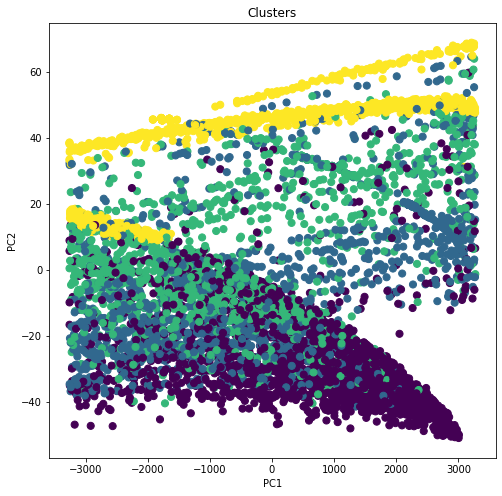

In [ ]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
principal_df['cluster'] = clusters
plt.figure(figsize=(8, 8))
plt.scatter(principal_df['PC1'], principal_df['PC2'], c=principal_df['cluster'], s=50)
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df, clusters, metric='euclidean')
print('Silhouette score:', score)

Silhouette score: -0.0739289219079896


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 20.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 20.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 20.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 20.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 20.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 8.0
Run 1, iteration: 2/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clust

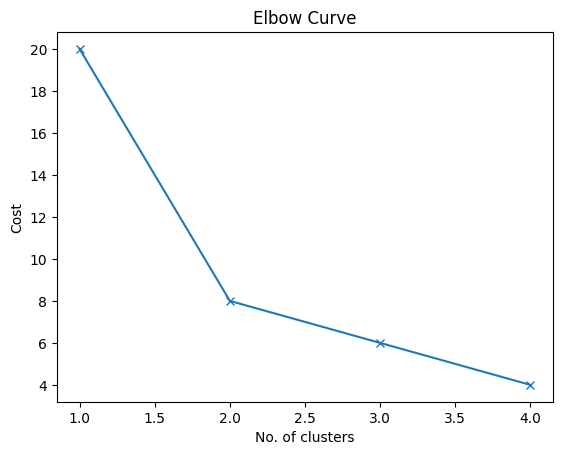

In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
# !pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
%matplotlib inline

# Generate sample data
data = np.array([
    ['A', 'B', 'C', 'D'],
    ['A', 'B', 'E', 'F'],
    ['A', 'B', 'C', 'F'],
    ['A', 'B', 'E', 'D'],
    ['G', 'H', 'I', 'J'],
    ['G', 'H', 'K', 'L'],
    ['G', 'H', 'I', 'L'],
    ['G', 'H', 'K', 'J'],
])

# Elbow curve to find optimal K
cost = []
K = range(1,5)
for k in list(K):
	kmode = KModes(n_clusters=k, init = "random", n_init = 5, verbose=1)
	kmode.fit_predict(data)
	cost.append(kmode.cost_)
	
plt.plot(K, cost, 'x-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Curve')
plt.show()


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 8.0
Run 1, iteration: 2/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 3, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 3, cost: 8.0
Run 3, iteration: 2/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 2, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2, cost: 8.0
Run 5, iteration: 2/100, moves: 1, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 2, cost: 8.0
Run 6, iteration: 2/100, moves: 0, cost: 8.0
Init: initializing centroids
Init: initializing clusters
Starting iter

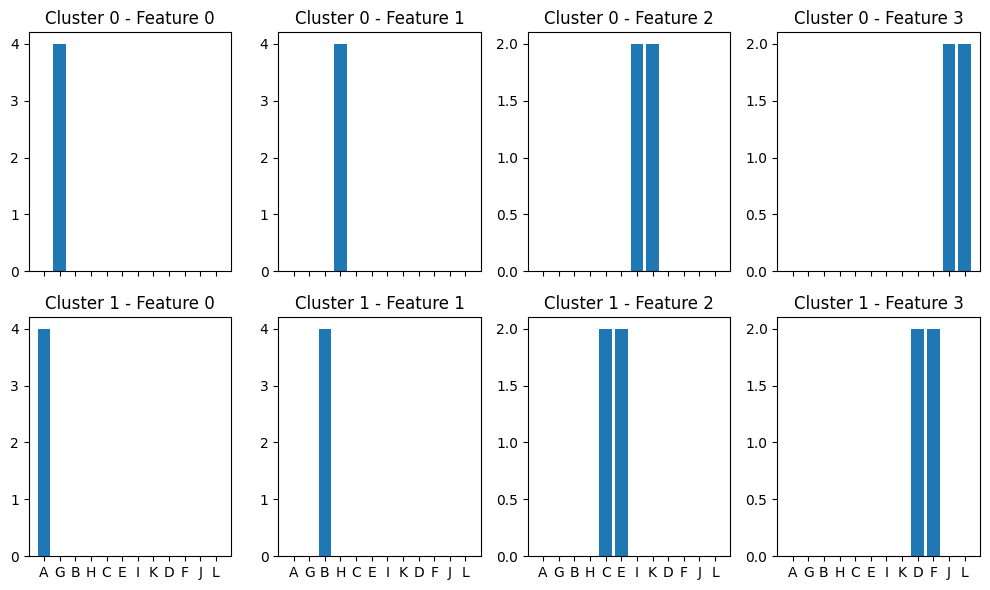

In [ ]:
from kmodes.kmodes import KModes
import numpy as np
import matplotlib.pyplot as plt


# Initialize KModes object and fit the data
km = KModes(n_clusters=2, init='Huang', verbose=1)
clusters = km.fit_predict(data)

# Get the frequency of each category within each cluster
cluster_freq = []
for i in range(km.n_clusters):
    freq = {}
    for j in range(data.shape[1]):
        freq[j] = {}
        for k in np.unique(data[:, j]):
            freq[j][k] = np.sum(data[clusters == i, j] == k)
    cluster_freq.append(freq)

# Plot the frequency of each category within each cluster
fig, axs = plt.subplots(km.n_clusters, data.shape[1], figsize=(10, 6), sharex=True)
for i in range(km.n_clusters):
    for j in range(data.shape[1]):
        axs[i, j].bar(cluster_freq[i][j].keys(), cluster_freq[i][j].values())
        axs[i, j].set_title('Cluster {} - Feature {}'.format(i, j))
plt.tight_layout()
plt.show()


In [ ]:

print(km.cluster_centroids_)

[['G' 'H' 'I' 'J']
 ['A' 'B' 'C' 'F']]


Without Library

In [ ]:
import numpy as np
import pandas as pd
import random

def hamming_distance(x1, x2):
    return np.sum(x1 != x2)

class KModes:
    def __init__(self, n_clusters, max_iter):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
    
    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = []
        for i in range(self.n_clusters):
            centroid = np.random.choice(X.shape[0])
            self.centroids.append(X[centroid])
        
        for i in range(self.max_iter):
            # Assign each data point to the nearest centroid
            clusters = [[] for _ in range(self.n_clusters)]
            for j, x in enumerate(X):
                distances = [hamming_distance(x, c) for c in self.centroids]
                cluster_idx = np.argmin(distances)
                clusters[cluster_idx].append(j)
            
            # Update centroids
            for k in range(self.n_clusters):
                if clusters[k]:
                    cluster_data = X[clusters[k]]
                    mode = []
                    for feature in range(cluster_data.shape[1]):
                        feature_counts = np.bincount(cluster_data[:, feature])
                        mode.append(np.argmax(feature_counts))
                    self.centroids[k] = mode
        
        # Return the cluster labels, clusters for each data point, and cluster centers
        self.labels_ = np.zeros(X.shape[0])
        self.clusters_ = [[] for _ in range(self.n_clusters)]
        for i, cluster in enumerate(clusters):
            for j in cluster:
                self.labels_[j] = i
                self.clusters_[i].append(X[j])
        self.centroids_ = self.centroids
        return self.labels_, self.clusters_, self.centroids_


In [ ]:
# Example usage
data = np.array([[1, 2, 3, 4],
                 [1, 2, 3, 5],
                 [2, 3, 4, 5],
                 [2, 3, 5, 6],
                 [7, 8, 9, 10],
                 [7, 8, 9, 11]])
km = KModes(n_clusters=2, max_iter=100)
labels, clusters, centroids = km.fit(data)
print('Cluster centers:')
for centroid in centroids:
    print(centroid)


Cluster centers:
[2, 3, 9, 5]
[1, 2, 3, 4]


In [ ]:
for i, cluster in enumerate(clusters):
    print(f'Cluster {i}:')
    for row in cluster:
        print(row)
    print()

Cluster 0:
[2 3 4 5]
[2 3 5 6]
[ 7  8  9 10]
[ 7  8  9 11]

Cluster 1:
[1 2 3 4]
[1 2 3 5]

